# Question 1

## Logistic Regression Implementation

Over the course of my experiments here I wish to improve our simple logistic regression classifier here. I will do this by experimenting with text processing and Porter stemming. There will be more details of these experiments later on. I also wish to experiment with the ***max_features*** for our vectoriser here. I want to test the adjustments I make to the model against the default settings over a span from 100 to 500 maximum number of features to compare the two model's performance accurately and fairly overtime. I will plot the results over time. I will also investigate the performance of our classifier using both training and test data. I will use an 80/20 training to test split on the training data and then use all the training data to test on 1000 instances of "unseen" test data. This will allow us to ensure our model is not prone to "overfitting" by only testing on the training data using an 80/20 split.

In [1]:
#pip install sklearn
import pandas as pd
import numpy as np
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction import text

In [2]:
#pip install datasets

In [3]:
from datasets import load_dataset

raw_datasets = load_dataset("imdb")
print(raw_datasets['train'][0])
print(raw_datasets['test'][0])

Reusing dataset imdb (C:\Users\user\.cache\huggingface\datasets\imdb\plain_text\1.0.0\2fdd8b9bcadd6e7055e742a706876ba43f19faee861df134affd7a3f60fc38a1)


  0%|          | 0/3 [00:00<?, ?it/s]

{'text': 'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far be

In [4]:
#train_dataset = raw_datasets['train'].shuffle(seed=42).select(range(25000))
train_dataset = raw_datasets['train']
train_data = []
train_data_labels = []
for item in train_dataset:
    train_data.append(item['text'])
    train_data_labels.append(item['label'])
print(len(train_data))

25000


In [5]:
vectorizer = CountVectorizer(analyzer = 'word', max_features = 200, lowercase = True)
features = vectorizer.fit_transform(train_data)
features_nd = features.toarray()
print(len(features_nd))
print(len(features_nd[0]))

25000
200


In [6]:
test_dataset = raw_datasets['test'].shuffle(seed = 42).select(range(1000))
test_data = []
test_data_labels = []
for item in test_dataset:
    test_data.append(item['text'])
    test_data_labels.append(item['label'])

Loading cached shuffled indices for dataset at C:\Users\user\.cache\huggingface\datasets\imdb\plain_text\1.0.0\2fdd8b9bcadd6e7055e742a706876ba43f19faee861df134affd7a3f60fc38a1\cache-2eff9f118d84c6fe.arrow


In [7]:
lab = pd.DataFrame(train_data_labels)
input_txt = pd.DataFrame(train_data)
input_txt.rename(columns = {0: 'text'}, inplace = True)
lab.rename(columns = {0: 'Label'}, inplace = True)

In [8]:
joined = input_txt.join(lab)
joined.shape

(25000, 2)

In [9]:
joined['text'] = joined['text'].astype('string')
joined.dtypes

text     string
Label     int64
dtype: object

In [10]:
tests = pd.DataFrame(test_data_labels)
input_txt1 = pd.DataFrame(test_data)
input_txt1.rename(columns = {0: 'text'}, inplace = True)
tests.rename(columns = {0: 'Label'}, inplace = True)

In [11]:
joinedtest = input_txt1.join(tests)
joinedtest.head()

,text,Label
0,<br /><br />When I unsuspectedly rented A Thou...,1
1,This is the latest entry in the long series of...,1
2,This movie was so frustrating. Everything seem...,0
3,"I was truly and wonderfully surprised at ""O' B...",1
4,This movie spends most of its time preaching t...,0


## Default Implementation of Logistic Regression

This is the example provided and will be the baseline for our experiments going forward.

In [12]:
from sklearn.linear_model import LogisticRegression
default1000 = {}
for i in range(100, 600, 100):
    vectorizer = CountVectorizer(analyzer = 'word', max_features = i, lowercase = True)
    features = vectorizer.fit_transform(train_data)
    features_nd = features.toarray()
    X_train, X_test, y_train, y_test = train_test_split(features_nd, train_data_labels, train_size = 0.8, random_state = 123)
    log_model = LogisticRegression()
    log_model = log_model.fit(X = X_train, y = y_train)
    y_pred = log_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    default1000[i] = acc

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

In [13]:
df = pd.DataFrame.from_dict(default1000, orient='index')
df.rename(columns = {0: 'Accuracy'}, inplace = True)

<AxesSubplot:title={'center':'Accuracy Scores for default LR implementation for 100 to 500 features'}>

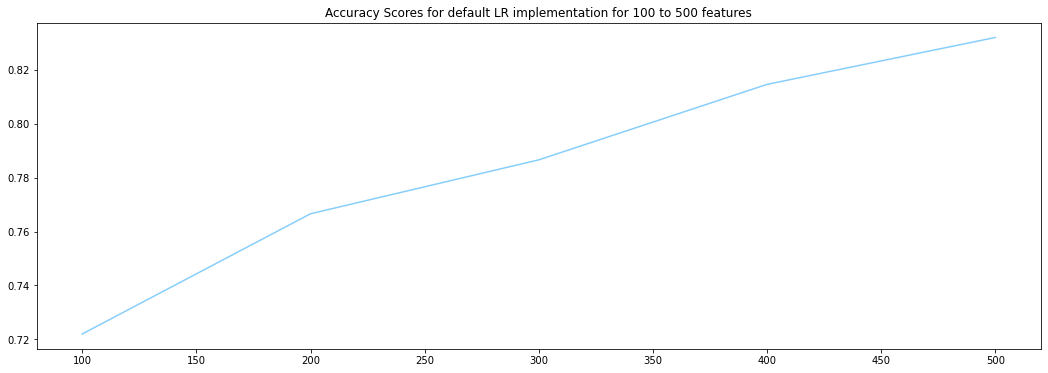

In [14]:
df['Accuracy'].plot(figsize = (18,6), color = 'lightskyblue',
                                 title = 'Accuracy Scores for default LR implementation for 100 to 500 features')

In [15]:
# test data
default1000test = {}
for i in range(100, 600, 100):
    vectorizer = CountVectorizer(analyzer = 'word', max_features = i, lowercase = True)
    features = vectorizer.fit_transform(train_data)
    features_nd = features.toarray()
    X_train, X_test, y_train, y_test = train_test_split(features_nd, train_data_labels, train_size = 0.8, random_state = 123)
    log_model = LogisticRegression()
    log_model = log_model.fit(X = X_train, y = y_train)
    y_pred = log_model.predict(vectorizer.transform(joinedtest['text']).toarray())
    acc = accuracy_score(joinedtest['Label'], y_pred)
    default1000test[i] = acc

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

<AxesSubplot:title={'center':'Accuracy Scores for default LR implementation for 100 to 500 features on test data'}>

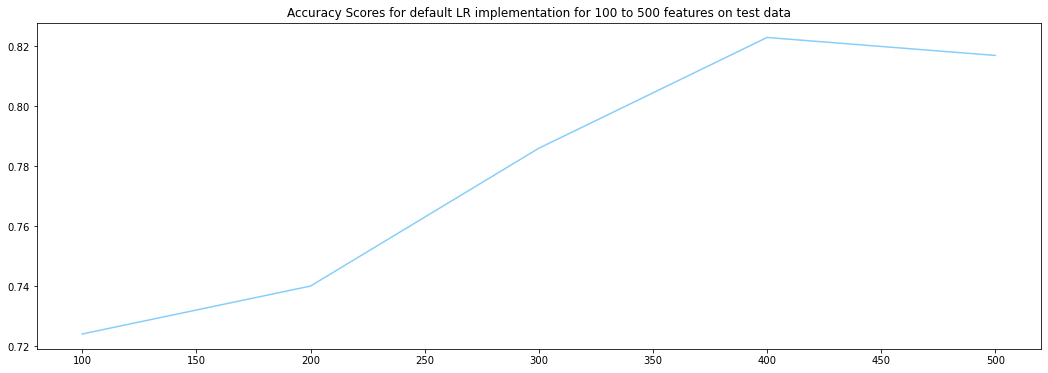

In [16]:
df10 = pd.DataFrame.from_dict(default1000test, orient='index')
df10.rename(columns = {0: 'Accuracy'}, inplace = True)
df10['Accuracy'].plot(figsize = (18, 6), color = 'lightskyblue',
                                 title = 'Accuracy Scores for default LR implementation for 100 to 500 features on test data')

## Ideas - Idea 1

### Stop Word and Punctuation Removal

This will be an iterative process trying different elements of text processing to improve results.

My first idea centers on the idea of removing stop words. This was something I tried for our Naive-Bayes implementation of a sentiment classifier and actually did not improve our model's accuracy. This may have been due to it being the top 50 occurring words so some may not have been actual stop words. We will use the NLTK library this time instead. Let's now try it for logistic regression here.

In [17]:
# swap the following ".*?" to an empty string
import re
new = joined['text'].apply(lambda words: re.sub('<.*?>','', words))

In [18]:
input_txt1 = pd.DataFrame(new)
input_txt1.rename(columns = {0: 'text'}, inplace = True)
joined1 = input_txt1.join(lab)
joined1.head()

,text,Label
0,I rented I AM CURIOUS-YELLOW from my video sto...,0
1,"""I Am Curious: Yellow"" is a risible and preten...",0
2,If only to avoid making this type of film in t...,0
3,This film was probably inspired by Godard's Ma...,0
4,"Oh, brother...after hearing about this ridicul...",0


In [20]:
# let's remove stop words using nltk library
import nltk
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english')) 
    
filtered_sentences = []
vals = np.array(joined1['text'])
  
for i in range(len(vals)):
    filtered_sentence = []
    instance = vals[i].split()
    for j in range(len(instance)):
        if instance[j] not in stop_words: 
            filtered_sentence.append(instance[j])
        else:
            continue
    filtered_sentences.append(filtered_sentence)

In [21]:
# punctuation
import string
filters = []
for i in range(len(filtered_sentences)):
    listToStr = ' '.join(map(str, filtered_sentences[i]))
    new_string = listToStr.translate(str.maketrans('', '', string.punctuation))
    filters.append(new_string)

In [22]:
input_txt2 = pd.DataFrame(new)
input_txt2.rename(columns = {0: 'text'}, inplace = True)
input_txt2['text'] = filters
joined2 = input_txt2.join(lab)
joined2.head()

,text,Label
0,I rented I AM CURIOUSYELLOW video store contro...,0
1,I Am Curious Yellow risible pretentious steami...,0
2,If avoid making type film future This film int...,0
3,This film probably inspired Godards Masculin f...,0
4,Oh brotherafter hearing ridiculous film umptee...,0


In [23]:
# lower all words in training
joined2['text'] = joined2['text'].apply(lambda words: [x.lower() for x in words.split()])

In [24]:
#### thats all we will try for now on our training data
# begin applying same previous steps to test data
new = joinedtest['text'].apply(lambda words: re.sub('<.*?>','', words))

In [25]:
# rm stopwords
stop_words = set(stopwords.words('english')) 
    
filtered_sentences = []
vals = np.array(joinedtest['text'])
  
for i in range(len(vals)):
    filtered_sentence = []
    instance = vals[i].split()
    for j in range(len(instance)):
        if instance[j] not in stop_words: 
            filtered_sentence.append(instance[j])
        else:
            continue
    filtered_sentences.append(filtered_sentence)

In [26]:
# rm punctuation
import string
filters = []
for i in range(len(filtered_sentences)):
    listToStr = ' '.join(map(str, filtered_sentences[i]))
    new_string = listToStr.translate(str.maketrans('', '', string.punctuation))
    filters.append(new_string)

In [27]:
joinedtest['text'] = filters

In [28]:
joinedtest['textstop'] = joinedtest['text'].apply(lambda words: [x.lower() for x in words.split()])

In [29]:
fix = []
for i in range(len(joinedtest['textstop'])):
    str1 = joinedtest['textstop'][i]
    str2 = ' '.join(str1)
    fix.append(str2)
joinedtest['textstop'] = fix

In [30]:
fix = []
for i in range(len(joined2['text'])):
    str1 = joined2['text'][i]
    str2 = ' '.join(str1)
    fix.append(str2)

In [31]:
joined2['text'] = fix

In [32]:
joined2.head()

,text,Label
0,i rented i am curiousyellow video store contro...,0
1,i am curious yellow risible pretentious steami...,0
2,if avoid making type film future this film int...,0
3,this film probably inspired godards masculin f...,0
4,oh brotherafter hearing ridiculous film umptee...,0


In [33]:
# lets test on our training data
# we will do an 80:20 training to test split here
# we will also test at different numbers of maximum number of features - 100,200,300,400,500
stop1000 = {}
for i in range(100, 600, 100):
    vectorizer = CountVectorizer(analyzer = 'word', max_features = i, lowercase = True)
    features = vectorizer.fit_transform(joined2['text'])
    features_nd = features.toarray()
    X_train, X_test, y_train, y_test = train_test_split(features_nd, train_data_labels, train_size = 0.8, random_state = 123)
    log_model = LogisticRegression()
    log_model = log_model.fit(X = X_train, y = y_train)
    y_pred = log_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    #print(acc)
    stop1000[i] = acc

In [34]:
df1 = pd.DataFrame.from_dict(stop1000, orient = 'index')
df1.rename(columns = {0: 'Accuracy'}, inplace = True)

In [35]:
# lets test on our test data now
# we will use all our training data this time and test on 1000 unseen instances
# we will also test at different numbers of maximum number of features again - 100,200,300,400,500
stop1000test = {}
for i in range(100, 600, 100):
    vectorizer = CountVectorizer(analyzer = 'word', max_features = i, lowercase = True)
    features = vectorizer.fit_transform(joined2['text'])
    features_nd = features.toarray()
    X_train, X_test, y_train, y_test = train_test_split(features_nd, train_data_labels, train_size = 0.8, random_state = 123)
    log_model = LogisticRegression()
    log_model = log_model.fit(X = X_train, y = y_train)
    y_pred = log_model.predict(vectorizer.transform(joinedtest['textstop']).toarray())
    acc = accuracy_score(joinedtest['Label'], y_pred)
    stop1000test[i] = acc

In [36]:
df11 = pd.DataFrame.from_dict(stop1000test, orient='index')
df11.rename(columns = {0: 'Accuracy'}, inplace = True)

### More text processing

In [38]:
## run this to install textblob neeeded for next cells
#pip install textblob

In [39]:
from textblob import Word
from nltk import word_tokenize
# lets tokenize our data now
joined2['text'] = joined2['text'].apply(word_tokenize)

In [40]:
fix = []
for i in range(len(joined2['text'])):
    str1 = joined2['text'][i]
    str2 = ' '.join(str1)
    fix.append(str2)

In [41]:
joined2['text'] = fix

In [42]:
## lemmatize the text now...
joined2['text'] = joined2['text'].apply(lambda words: " ".join([Word(x).lemmatize() for x in words.split()]))

In [43]:
# same steps for test data
joinedtest['textstoplem'] = joinedtest['textstop'].apply(word_tokenize)

In [44]:
fix = []
for i in range(len(joinedtest['textstoplem'])):
    str1 = joinedtest['textstoplem'][i]
    str2 = ' '.join(str1)
    fix.append(str2)
joinedtest['textstoplem'] = fix

In [45]:
joinedtest['textstoplem'] = joinedtest['textstoplem'].apply(lambda words: " ".join([Word(x).lemmatize() for x in words.split()]))

In [46]:
token1000 = {}
for i in range(100, 600, 100):
    vectorizer = CountVectorizer(analyzer = 'word', max_features = i, lowercase = True)
    features = vectorizer.fit_transform(joined2['text'])
    features_nd = features.toarray()
    X_train, X_test, y_train, y_test = train_test_split(features_nd, train_data_labels, train_size = 0.8, random_state = 123)
    log_model = LogisticRegression()
    log_model = log_model.fit(X = X_train, y = y_train)
    y_pred = log_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    token1000[i] = acc

In [47]:
df7 = pd.DataFrame.from_dict(token1000, orient = 'index')
df7.rename(columns = {0: 'Accuracy'}, inplace = True)

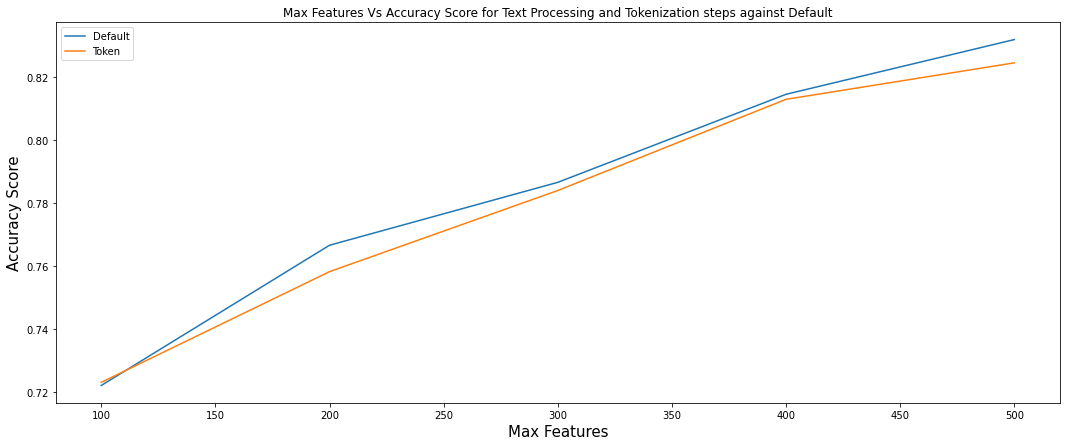

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (18, 7))
df['Accuracy'].plot(label = 'Default')
df7['Accuracy'].plot(label = 'Token')
plt.xlabel('Max Features', fontsize = 15)
plt.ylabel('Accuracy Score', fontsize = 15)
plt.title('Max Features Vs Accuracy Score for Text Processing and Tokenization steps against Default')
plt.legend()
plt.show()

In [49]:
token1000test = {}
for i in range(100, 600, 100):
    vectorizer = CountVectorizer(analyzer = 'word', max_features = i, lowercase = True)
    features = vectorizer.fit_transform(joined2['text'])
    features_nd = features.toarray()
    X_train, X_test, y_train, y_test = train_test_split(features_nd, train_data_labels, train_size = 0.8, random_state = 123)
    log_model = LogisticRegression()
    log_model = log_model.fit(X = X_train, y = y_train)
    y_pred = log_model.predict(vectorizer.transform(joinedtest['textstoplem']).toarray())
    acc = accuracy_score(joinedtest['Label'], y_pred)
    token1000test[i] = acc

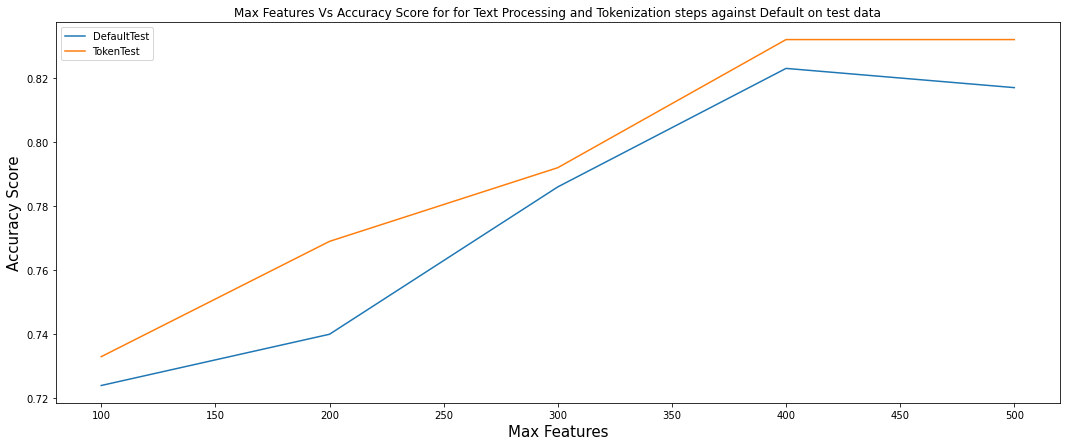

In [50]:
df14 = pd.DataFrame.from_dict(token1000test, orient='index')
df14.rename(columns = {0: 'Accuracy'}, inplace = True)
fig, ax = plt.subplots(figsize = (18, 7))
df10['Accuracy'].plot(label = 'DefaultTest')
df14['Accuracy'].plot(label = 'TokenTest')
plt.xlabel('Max Features', fontsize = 15)
plt.ylabel('Accuracy Score', fontsize = 15)
plt.title('Max Features Vs Accuracy Score for for Text Processing and Tokenization steps against Default on test data')
plt.legend()
plt.show()

### Remove Frequent Words
Last iteration of our text processing.

In [51]:
d = {}
vals = np.array(joined2['text'])
for i in range(len(vals)):
    wrds = vals[i].split()
    for j in range(len(wrds)):
        if wrds[j] not in d:
            d[wrds[j]] = 1
        else:
            d[wrds[j]] += 1

In [52]:
# stop words all gone , so this is most frequent words excluding stop words
dfwrds = pd.DataFrame.from_dict(d, orient = 'index')
dfwrds.rename(columns = {0: 'Freq'}, inplace = True)
dfwrds.reset_index(inplace = True)
dfwrds.head()

,index,Freq
0,i,67915
1,rented,337
2,am,158
3,curiousyellow,3
4,video,1683


In [53]:
dfwrds = dfwrds.sort_values(by = 'Freq', ascending = False)

In [54]:
### rm these
rm = list(dfwrds['index'][:10])
rm

['i', 'movie', 'film', 'the', 'it', 'one', 'like', 'this', 'time', 'good']

In [55]:
# remove words found in list in cell above
joined2['freqtext'] = joined2['text'].apply(lambda words: [x for x in words.split() if x not in rm])

In [56]:
fix = []
for i in range(len(joined2['freqtext'])):
    str1 = joined2['freqtext'][i]
    str2 = ' '.join(str1)
    fix.append(str2)
joined2['freqtext'] = fix

In [57]:
freq1000 = {}
for i in range(100, 600, 100):
    vectorizer = CountVectorizer(analyzer = 'word', max_features = i, lowercase = True)
    features = vectorizer.fit_transform(joined2['freqtext'])
    features_nd = features.toarray()
    X_train, X_test, y_train, y_test = train_test_split(features_nd, train_data_labels, train_size = 0.8, random_state = 123)
    log_model = LogisticRegression()
    log_model = log_model.fit(X = X_train, y = y_train)
    y_pred = log_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    freq1000[i] = acc

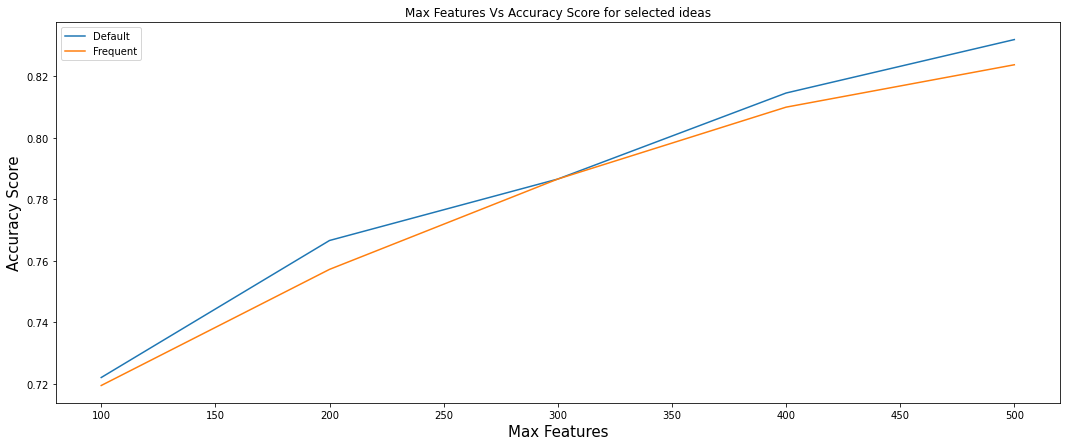

In [58]:
df9 = pd.DataFrame.from_dict(freq1000, orient = 'index')
df9.rename(columns = {0: 'Accuracy'}, inplace = True)
fig, ax = plt.subplots(figsize = (18, 7))
df['Accuracy'].plot(label = 'Default')
df9['Accuracy'].plot(label = 'Frequent')
plt.xlabel('Max Features', fontsize = 15)
plt.ylabel('Accuracy Score', fontsize = 15)
plt.title('Max Features Vs Accuracy Score for selected ideas')
plt.legend()
plt.show()

In [59]:
joinedtest['textstoplemfreq'] = joinedtest['textstoplem'].apply(lambda words: [x for x in words.split() if x not in rm])

In [60]:
# tested this without applying these changes to test data and worked v well also!
fix = []
for i in range(len(joinedtest['textstoplemfreq'])):
    str1 = joinedtest['textstoplemfreq'][i]
    str2 = ' '.join(str1)
    fix.append(str2)
joinedtest['textstoplemfreq'] = fix

In [61]:
# test
freq1000test = {}
for i in range(100, 600, 100):
    vectorizer = CountVectorizer(analyzer = 'word', max_features = i, lowercase = True)
    features = vectorizer.fit_transform(joined2['freqtext'])
    features_nd = features.toarray()
    X_train, X_test, y_train, y_test = train_test_split(features_nd, train_data_labels, train_size = 0.8, random_state = 123)
    log_model = LogisticRegression()
    log_model = log_model.fit(X = X_train, y = y_train)
    y_pred = log_model.predict(vectorizer.transform(joinedtest['textstoplemfreq']).toarray())
    acc = accuracy_score(joinedtest['Label'], y_pred)
    freq1000test[i] = acc

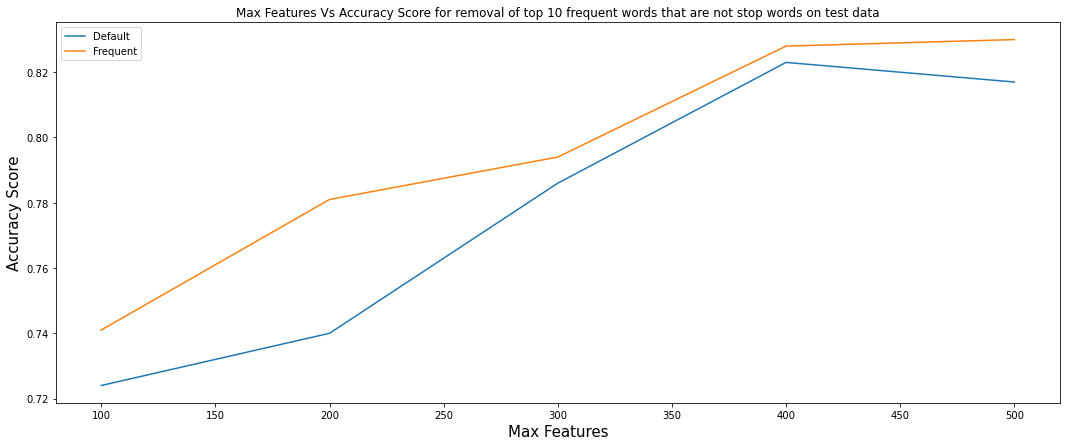

In [62]:
# marginally improves on our previous iteration
df16 = pd.DataFrame.from_dict(freq1000test, orient = 'index')
df16.rename(columns = {0: 'Accuracy'}, inplace = True)
fig, ax = plt.subplots(figsize = (18, 7))
df10['Accuracy'].plot(label = 'Default')
df16['Accuracy'].plot(label = 'Frequent')
plt.xlabel('Max Features', fontsize = 15)
plt.ylabel('Accuracy Score', fontsize = 15)
plt.title('Max Features Vs Accuracy Score for removal of top 10 frequent words that are not stop words on test data')
plt.legend()
plt.show()

## Idea 2
### Stemming

Stemming is a method of removing the suffix of the word and bringing it to a base word. It is a normalization technique used in NLP that reduces the number of computations required. It reduces computations by brining words back to the base word by removing suffixes from all the words. If there are words such as "walk" and "walks" in a dataset that are different but similar contextually stemming allows us to normalize these words and treat them the same. We will apply this to our training and test data in the hope we can improve our models accuracy.

In [63]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
porter_stemmer = PorterStemmer()
def stem_sentences(sentence):
    tokens = sentence.split()
    stemmed_tokens = [porter_stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

joined2['porter'] = joined2['text'].apply(stem_sentences)

In [64]:
porter1000 = {}
for i in range(100, 600, 100):
    vectorizer = CountVectorizer(analyzer = 'word', max_features = i, lowercase = True)
    features = vectorizer.fit_transform(joined2['porter'])
    features_nd = features.toarray()
    X_train, X_test, y_train, y_test = train_test_split(features_nd, train_data_labels, train_size = 0.8, random_state = 123)
    log_model = LogisticRegression()
    log_model = log_model.fit(X = X_train, y = y_train)
    y_pred = log_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    porter1000[i] = acc

In [65]:
df8 = pd.DataFrame.from_dict(porter1000, orient = 'index')
df8.rename(columns = {0: 'Accuracy'}, inplace = True)

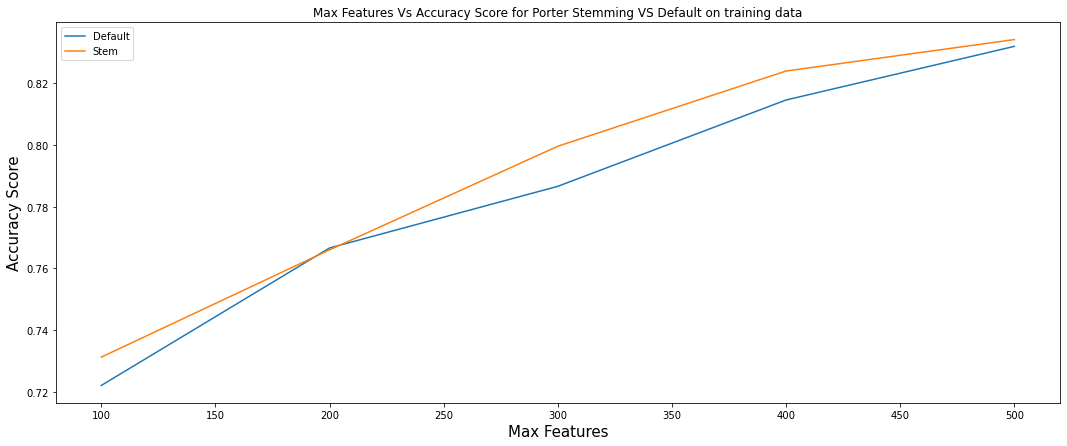

In [66]:
fig, ax = plt.subplots(figsize = (18, 7))
df['Accuracy'].plot(label = 'Default')
df8['Accuracy'].plot(label = 'Stem')
plt.xlabel('Max Features', fontsize = 15)
plt.ylabel('Accuracy Score', fontsize = 15)
plt.title('Max Features Vs Accuracy Score for Porter Stemming VS Default on training data')
plt.legend()
plt.show()

In [67]:
# apply Porter stemming to test data
joinedtest['porter'] = joinedtest['textstoplem'].apply(stem_sentences)

In [68]:
#test
porter1000test = {}
for i in range(100, 600, 100):
    vectorizer = CountVectorizer(analyzer = 'word', max_features = i, lowercase = True)
    features = vectorizer.fit_transform(joined2['porter'])
    features_nd = features.toarray()
    X_train, X_test, y_train, y_test = train_test_split(features_nd, train_data_labels, train_size = 0.8, random_state = 123)
    log_model = LogisticRegression()
    log_model = log_model.fit(X = X_train, y = y_train)
    y_pred = log_model.predict(vectorizer.transform(joinedtest['porter']).toarray())
    acc = accuracy_score(joinedtest['Label'], y_pred)
    porter1000test[i] = acc

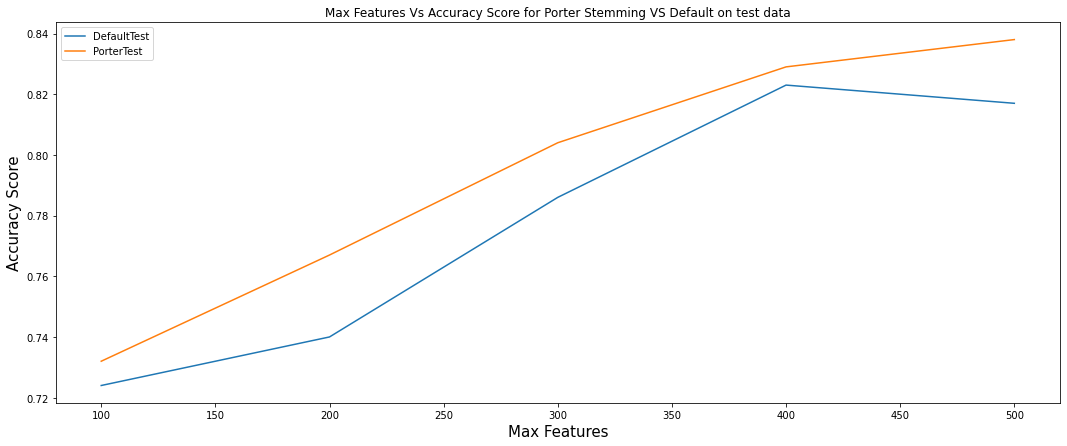

In [69]:
df15 = pd.DataFrame.from_dict(porter1000test, orient = 'index')
df15.rename(columns = {0: 'Accuracy'}, inplace = True)
fig, ax = plt.subplots(figsize = (18, 7))
df10['Accuracy'].plot(label = 'DefaultTest')
df15['Accuracy'].plot(label = 'PorterTest')
plt.xlabel('Max Features', fontsize = 15)
plt.ylabel('Accuracy Score', fontsize = 15)
plt.title('Max Features Vs Accuracy Score for Porter Stemming VS Default on test data')
plt.legend()
plt.show()

### Observations
Really strong results on both training data split and unseen test data for our Porter stemming here. We have now found two methods that improve our LR classifier!

### Export Model VS BERT

This is for part 2 when we compare our BERT and LR models. Using model from first idea trained on a maximum of 200 features.

In [86]:
# test on frequent words
vectorizer = CountVectorizer(analyzer = 'word', max_features = 200, lowercase = True)
features = vectorizer.fit_transform(joined2['freqtext'])
features_nd = features.toarray()
X_train, X_test, y_train, y_test = train_test_split(features_nd, train_data_labels, train_size = 0.8, random_state = 123)
log_model = LogisticRegression()
log_model = log_model.fit(X = X_train, y = y_train)
y_pred = log_model.predict(vectorizer.transform(joinedtest['textstoplemfreq']).toarray())
acc = accuracy_score(joinedtest['Label'], y_pred)
freq1000test[i] = acc

In [87]:
lst = []
lst1 = []
for i in range(len(joinedtest)):
    predicted = y_pred[i]
    gold = joinedtest['Label'][i]
    if predicted == gold: # prediction is correct
        if predicted == 1:
            #print('TP: ' + item['text'])
            lst.append('TP')
            lst1.append(joinedtest['text'][i])
        else:
            #print('TN: ' + item['text'])
            lst.append('TN')
            lst1.append(joinedtest['text'][i])
    else: 
        if predicted == 1:
            #print('FP: ' + item['text'])
            lst.append('FP')
            lst1.append(joinedtest['text'][i])
        else:
            #print('FN: ' + item['text'])
            lst.append('FN')
            lst1.append(joinedtest['text'][i])

In [88]:
dfeval = pd.DataFrame(columns=['Result','Text'])
dfeval

,Result,Text


In [89]:
dfeval['Result'] = lst
dfeval['Text'] = lst1

In [90]:
dfeval.head()

,Result,Text
0,TP,br br When I unsuspectedly rented A Thousand A...
1,TP,This latest entry long series films French age...
2,TN,This movie frustrating Everything seemed energ...
3,FN,I truly wonderfully surprised O Brother Where ...
4,TN,This movie spends time preaching script makes ...


## Final Idea
We have two ideas that work in improving our LR classifier but let's try one more first.
This will be including either bigrams or trigrams as features. Let's do some analysis first on bigram counts in our data.

In [76]:
bigram_converter = CountVectorizer(ngram_range = [2, 2]) 

In [77]:
x1 = bigram_converter.fit_transform(train_data)
words1 = bigram_converter.get_feature_names()

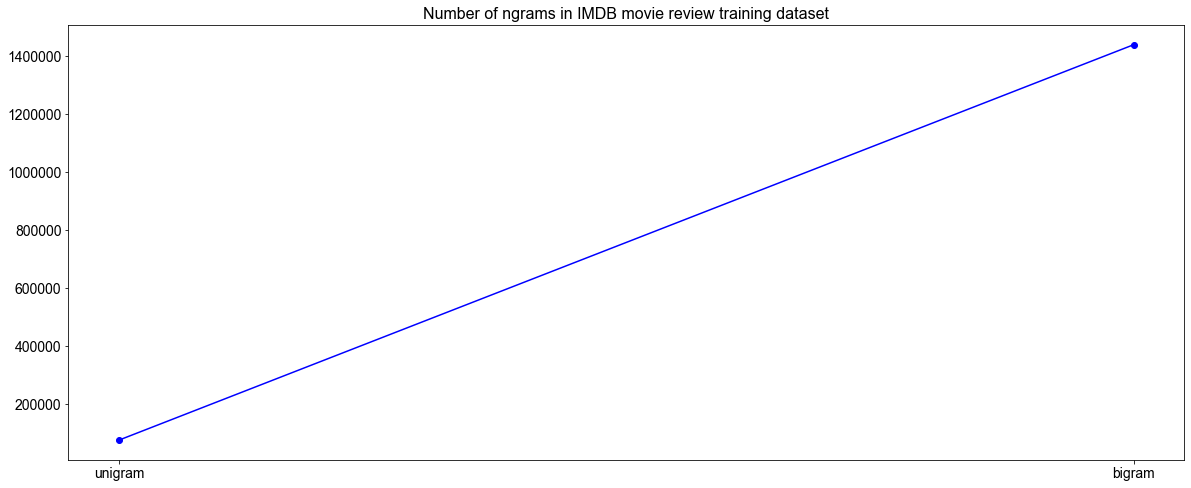

In [78]:
plt.subplots(figsize = (20, 8))
sns.set_style("white")
counts = [len(words), len(words1)]
plt.plot(counts, color = 'blue')
plt.plot(counts, 'bo')
plt.ticklabel_format(style = 'plain')
plt.xticks(range(2), ['unigram', 'bigram'])
plt.tick_params(labelsize = 14)
plt.title('Number of ngrams in IMDB movie review training dataset', {'fontsize': 16})
plt.show()

In [79]:
bigram1000 = {}
for i in range(100, 600, 100):
    vectorizer = CountVectorizer(tokenizer = lambda doc: doc, ngram_range = [2, 2], lowercase = True, max_features = i)
    features = vectorizer.fit_transform(train_data)
    features_nd = features.toarray()
    X_train, X_test, y_train, y_test = train_test_split(features_nd, train_data_labels, train_size = 0.8, random_state = 123)
    log_model = LogisticRegression()
    log_model = log_model.fit(X = X_train, y = y_train)
    y_pred = log_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    bigram1000[i] = acc

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

In [80]:
df2 = pd.DataFrame.from_dict(bigram1000, orient = 'index')
df2.rename(columns = {0: 'Accuracy'}, inplace = True)

In [81]:
bigram1000test = {}
for i in range(100, 600, 100):
    # bigrams vectorized
    vectorizer = CountVectorizer(tokenizer = lambda doc: doc, ngram_range = [2, 2], lowercase = True, max_features = i)
    # fit this to training data
    features = vectorizer.fit_transform(train_data)
    features_nd = features.toarray()
    X_train, X_test, y_train, y_test = train_test_split(features_nd, train_data_labels, train_size = 0.8, random_state = 123)
    log_model = LogisticRegression()
    log_model = log_model.fit(X = X_train, y = y_train)
    y_pred = log_model.predict(vectorizer.transform(joinedtest['textstop']).toarray())
    acc = accuracy_score(joinedtest['Label'], y_pred)
    bigram1000test[i] = acc

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

In [82]:
df12 = pd.DataFrame.from_dict(bigram1000test, orient = 'index')
df12.rename(columns = {0: 'Accuracy'}, inplace = True)

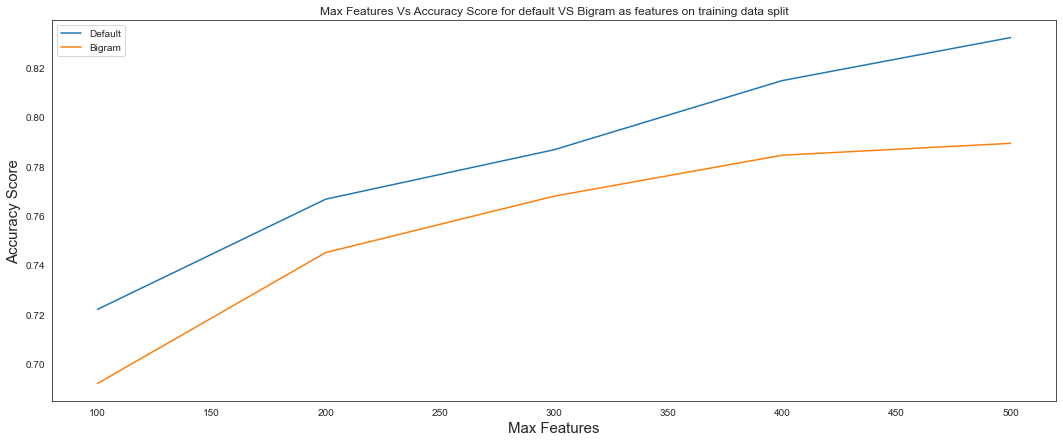

In [83]:
fig, ax = plt.subplots(figsize = (18, 7))
df['Accuracy'].plot(label = 'Default')
df2['Accuracy'].plot(label = 'Bigram')
plt.xlabel('Max Features', fontsize = 15)
plt.ylabel('Accuracy Score', fontsize = 15)
plt.title('Max Features Vs Accuracy Score for default VS Bigram as features on training data split')
plt.legend()
plt.show()

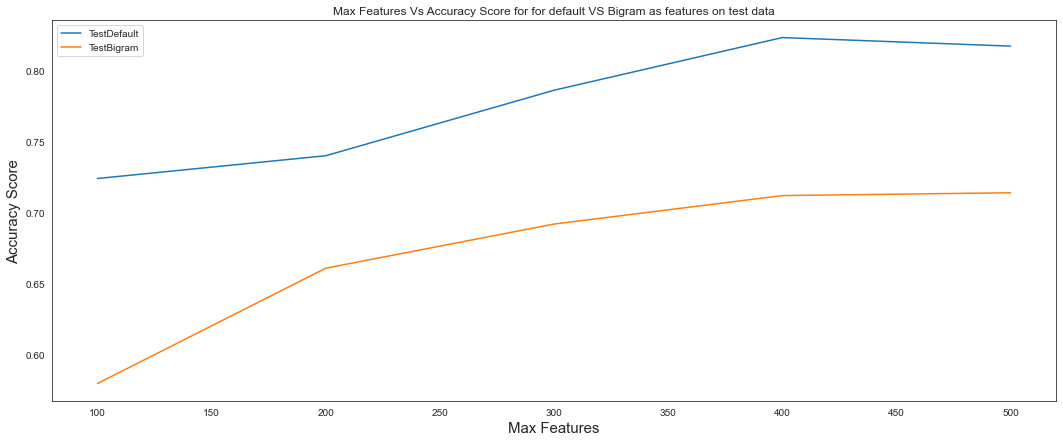

In [84]:
fig, ax = plt.subplots(figsize = (18, 7))
df10['Accuracy'].plot(label = 'TestDefault')
df12['Accuracy'].plot(label = 'TestBigram')
plt.xlabel('Max Features', fontsize = 15)
plt.ylabel('Accuracy Score', fontsize = 15)
plt.title('Max Features Vs Accuracy Score for for default VS Bigram as features on test data')
plt.legend()
plt.show()

### Final Summary

The two key ideas here are:

- application of Porter Stemming to data, works very well improving features over different values for max number of features.
- removing stop words, lemmatization, removing punctuation, all lowercase lettering and removal of top 10 frequent words that are not on NLTK's list of stop words. Also successfully improved the accuracy of our classifications.

#### Lastly,
- We also tried using Bigrams as features also but to no avail / poor results.

In [91]:
#dfeval.to_csv('evaluationlogistic.csv')